In [16]:
import pandas as pd
import matplotlib.pyplot as plt

**Steps to prepare the time series data for line plots:**
>1. Grouping the panel data by time and summing over the countries to get total value of trade for unique and reproducible cultural goods and total merchandise trade for all years
>2. Merginf this grouped data with cleaned network metrics datasets on time, so that the new dataframe will have 24 rows one for each year, and 15 columns(4 types of global culstering coefficient from each dataset and the three columns with total value of unique, and reproducible cultural goods and total goods trade)

In [17]:
att = pd.read_csv("../data/cleaned/panel_complete.csv")

In [18]:
att.head(2)

,iso_o,iso_d,TIME_PERIOD,total_tr,unique_cultural_tr,reproducible_cultural_tr,hysteresis_total,hysteresis_unique,hysteresis_repro,rta,...,log_gdp_pct_d,log_population_d,D_log_gdp_pct_d,D_log_gdp_d,country_d,landlocked_d,continent_d,category_d,development_d,dyad_id
0,ABW,AFG,2000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,5.164386,16.817738,-5.480439,-5.468311,Afghanistan,1,Asia,Emerging and Developing Economies,0.0,ABW-AFG
1,ABW,AFG,2001,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,4.932385,16.825357,-0.232000,-0.224409,Afghanistan,1,Asia,Emerging and Developing Economies,0.0,ABW-AFG


In [19]:
panel = att.groupby('TIME_PERIOD')[['total_tr','unique_cultural_tr','reproducible_cultural_tr']].sum().reset_index()	

In [20]:
panel.head(24)

,TIME_PERIOD,total_tr,unique_cultural_tr,reproducible_cultural_tr
0,2000,4.981214e+06,11411.849742,9.498586e+05
1,2001,4.907092e+06,11375.781153,8.500164e+05
2,2002,5.164909e+06,10879.885603,8.583141e+05
3,2003,6.049558e+06,10986.268410,9.690696e+05
4,2004,7.346542e+06,13222.525075,1.175806e+06
5,2005,8.344260e+06,14694.197797,1.295366e+06
6,2006,9.623581e+06,17170.327970,1.488212e+06
7,2007,1.114976e+07,22919.333540,1.653848e+06
8,2008,1.312167e+07,22326.624278,1.744039e+06
9,2009,1.005637e+07,15555.158735,1.436530e+06


In [21]:
total_net = pd.read_csv("../data/cleaned/network_metrics_timeseries_total.csv")
repro_net = pd.read_csv("../data/cleaned/network_metrics_timeseries_reproducible.csv")
unique_net = pd.read_csv("../data/cleaned/network_metrics_timeseries_unique.csv")

In [22]:
panel_unique = panel.merge(unique_net, on = ['TIME_PERIOD'], how = 'left')

In [23]:
panel_unique1 = panel_unique.merge(repro_net, on = ['TIME_PERIOD'], how = 'left')

In [24]:
panel_unique2 = panel_unique1.merge(total_net, on = ['TIME_PERIOD'], how = 'left')

In [25]:
panel_unique2.columns

Index(['TIME_PERIOD', 'total_tr', 'unique_cultural_tr',
       'reproducible_cultural_tr', 'Unnamed: 0_x', 'Global_CC_Cl_unique',
       'Global_CC_Fg_unique', 'Avg_CC_Cl_unique', 'Avg_CC_Fg_unique',
       'assortcoef_unique.outout',
       ...
       'assortcoef_total.inout.21', 'assortcoef_total.inin.21',
       'assortcoef_total.outout.22', 'assortcoef_total.outin.22',
       'assortcoef_total.inout.22', 'assortcoef_total.inin.22',
       'assortcoef_total.outout.23', 'assortcoef_total.outin.23',
       'assortcoef_total.inout.23', 'assortcoef_total.inin.23'],
      dtype='object', length=307)

In [26]:
panel_unique2.head(3)

,TIME_PERIOD,total_tr,unique_cultural_tr,reproducible_cultural_tr,Unnamed: 0_x,Global_CC_Cl_unique,Global_CC_Fg_unique,Avg_CC_Cl_unique,Avg_CC_Fg_unique,assortcoef_unique.outout,...,assortcoef_total.inout.21,assortcoef_total.inin.21,assortcoef_total.outout.22,assortcoef_total.outin.22,assortcoef_total.inout.22,assortcoef_total.inin.22,assortcoef_total.outout.23,assortcoef_total.outin.23,assortcoef_total.inout.23,assortcoef_total.inin.23
0,2000,4.981214e+06,11411.849742,949858.640220,1,0.872778,0.828585,0.872778,0.828585,-0.078667,...,-0.134644,-0.118502,-0.130491,-0.097658,-0.132913,-0.119698,-0.150058,-0.121061,-0.146614,-0.134752
1,2001,4.907092e+06,11375.781153,850016.376857,2,0.858401,0.823102,0.858401,0.823102,-0.078667,...,-0.134644,-0.118502,-0.130491,-0.097658,-0.132913,-0.119698,-0.150058,-0.121061,-0.146614,-0.134752
2,2002,5.164909e+06,10879.885603,858314.078135,3,0.854435,0.833117,0.854435,0.833117,-0.078667,...,-0.134644,-0.118502,-0.130491,-0.097658,-0.132913,-0.119698,-0.150058,-0.121061,-0.146614,-0.134752


In [27]:
panel['total'] = panel['unique_cultural_tr'] + panel['reproducible_cultural_tr'] + panel['total_tr']
panel['percentage_u'] = panel['unique_cultural_tr']*100/ panel['total'] 
panel['percentage_r'] = panel['reproducible_cultural_tr']*100/ panel['total'] 
panel['percentage_n'] = panel['total_tr']*100/ panel['total'] 

In [28]:
panel['percentage_t'] = panel['percentage_u'] + panel['percentage_r'] + panel['percentage_n'] 

In [29]:
panel_3 = panel[['TIME_PERIOD', 'percentage_n', 'percentage_r', 'percentage_u']]
panel_3 = panel_3.round(2)

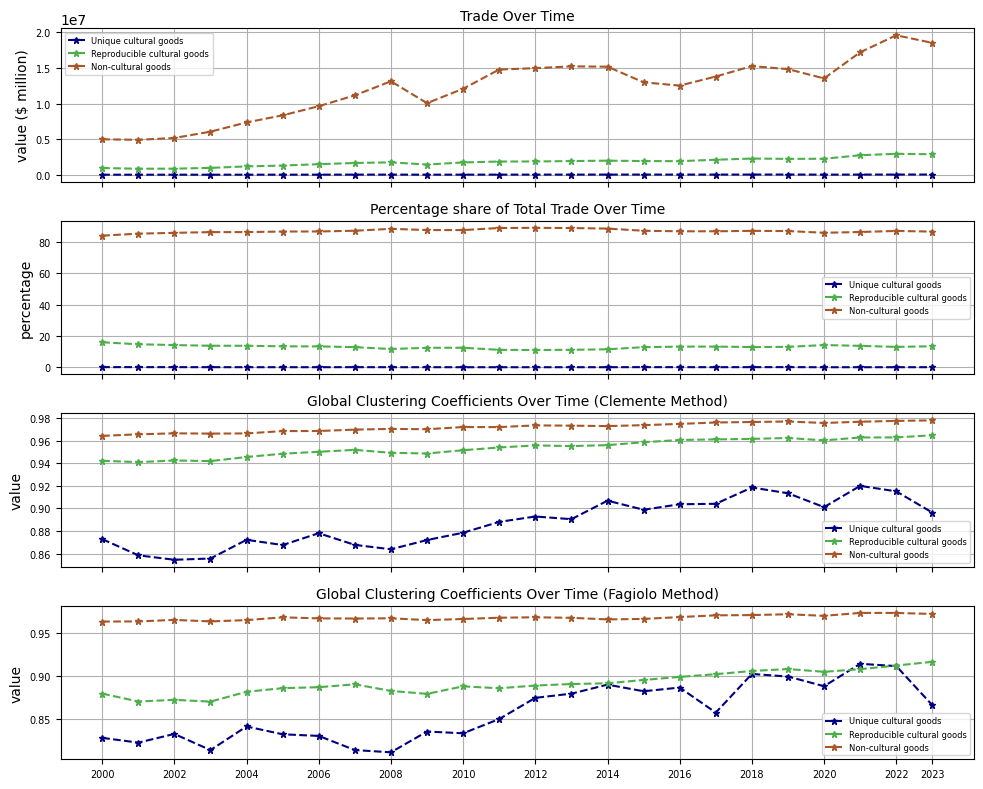

In [30]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 8), sharex=True)
axes[0].plot(panel_unique2["TIME_PERIOD"], panel_unique2["unique_cultural_tr"], label="Unique Cultural Trade", marker='*', markersize = 5, linestyle = "dashed", color = '#000080')
axes[0].plot(panel_unique2["TIME_PERIOD"], panel_unique2["reproducible_cultural_tr"], label="Reproducible Cultural Trade", marker='*', markersize = 5, linestyle = "dashed", color = '#4daf4a')
axes[0].plot(panel_unique2["TIME_PERIOD"], panel_unique2["total_tr"], label="Non-cultural Goods Trade", marker='*', markersize = 5, linestyle = "dashed",  color = '#a65628')
axes[0].set_title("Trade Over Time", fontsize = 10)
#axes[0].set_xlabel("Year", fontsize = 7)
axes[0].set_ylabel("value ($ million)", fontsize = 10)
axes[0].set_xticks([2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020, 2022, 2023])
#axes[0].tick_params(axis='x', labelsize=7)
axes[0].tick_params(axis='y', labelsize=7)
axes[0].legend(["Unique cultural goods", "Reproducible cultural goods", "Non-cultural goods"], fontsize=6)
axes[0].grid(True)

axes[1].plot(panel_3["TIME_PERIOD"], panel_3["percentage_u"], label="Unique Cultural Trade", marker='*', markersize = 5, linestyle = "dashed", color = '#000080')
axes[1].plot(panel_3["TIME_PERIOD"], panel_3["percentage_r"], label="Reproducible Cultural Trade", marker='*', markersize = 5, linestyle = "dashed", color = '#4daf4a')
axes[1].plot(panel_3["TIME_PERIOD"], panel_3["percentage_n"], label="Non-cultural Goods Trade", marker='*', markersize = 5, linestyle = "dashed",  color = '#a65628')
axes[1].set_title("Percentage share of Total Trade Over Time", fontsize = 10)
#axes0].set_xlabel("Year", fontsize = 7)
axes[1].set_ylabel("percentage", fontsize = 10)
axes[1].set_xticks([2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020, 2022, 2023])
#axes[0].tick_params(axis='x', labelsize=7)
axes[1].tick_params(axis='y', labelsize=7)
axes[1].legend(["Unique cultural goods", "Reproducible cultural goods", "Non-cultural goods"], fontsize=6)
axes[1].grid(True)

axes[2].plot(panel_unique2["TIME_PERIOD"], panel_unique2["Global_CC_Cl_unique"], label="Unique Cultural Trade", marker='*', markersize = 5, linestyle = "dashed", color = '#000080')
axes[2].plot(panel_unique2["TIME_PERIOD"], panel_unique2["Global_CC_Cl_repro"], label="Reproducible Cultural Trade", marker='*', markersize = 5, linestyle = "dashed", color = '#4daf4a')
axes[2].plot(panel_unique2["TIME_PERIOD"], panel_unique2["Global_CC_Cl_total"], label="Non-cultural Goods Trade", marker='*', markersize = 5, linestyle = "dashed", color = '#a65628')
axes[2].set_title("Global Clustering Coefficients Over Time (Clemente Method)", fontsize = 10)
#axes21].set_xlabel("Year", fontsize = 7)
axes[2].set_ylabel("value", fontsize = 10)
axes[2].set_xticklabels([2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020, 2022, 2023])
#axes1].tick_params(axis='x', labelsize=7)
axes[2].tick_params(axis='y', labelsize=7)
axes[2].legend(["Unique cultural goods", "Reproducible cultural goods", "Non-cultural goods"], fontsize = 6)
axes[2].grid(True)

axes[3].plot(panel_unique2["TIME_PERIOD"], panel_unique2["Global_CC_Fg_unique"], label="Unique Cultural Trade", marker='*', markersize = 5, linestyle = "dashed", color = '#000080')
axes[3].plot(panel_unique2["TIME_PERIOD"], panel_unique2["Global_CC_Fg_repro"], label="Reproducible Cultural Trade", marker='*', markersize = 5, linestyle = "dashed", color = '#4daf4a')
axes[3].plot(panel_unique2["TIME_PERIOD"], panel_unique2["Global_CC_Fg_total"], label="Non-cultural Goods Trade", marker='*', markersize = 5, linestyle = "dashed", color = '#a65628')
axes[3].set_title("Global Clustering Coefficients Over Time (Fagiolo Method)", fontsize = 10)
#axes[2].set_xlabel("Year", fontsize = 7)
axes[3].set_ylabel("value", fontsize = 10)
axes[3].set_xticklabels([2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020, 2022, 2023])
axes[3].tick_params(axis='x', labelsize=7)
axes[3].tick_params(axis='y', labelsize=7)
axes[3].legend(["Unique cultural goods", "Reproducible cultural goods", "Non-cultural goods"], fontsize = 6)
axes[3].grid(True)

plt.tight_layout()
plt.show()

#fig.savefig('../results/Fig1.tiff', format="tiff")

In [31]:
# import matplotlib.animation as animation
# fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(7, 7), sharex=True)

# years = panel_unique2["TIME_PERIOD"].values

# def update(frame):
#     for ax in axes.flat:
#         ax.clear()

#     upto = frame + 1  
#     axes[0].plot(panel_unique2["TIME_PERIOD"], panel_unique2["unique_cultural_tr"], label="Unique Cultural Trade", marker='*', markersize = 5, linestyle = "dashed", color = '#000080')
#     axes[0].plot(panel_unique2["TIME_PERIOD"], panel_unique2["reproducible_cultural_tr"], label="Reproducible Cultural Trade", marker='*', markersize = 5, linestyle = "dashed", color = '#4daf4a')
#     axes[0].plot(panel_unique2["TIME_PERIOD"], panel_unique2["total_tr"], label="Total Merchandise Trade", marker='*', markersize = 5, linestyle = "dashed",  color = '#a65628')
#     axes[0].set_title("Trade Over Time", fontsize = 10)
#     #axes[0].set_xlabel("Year", fontsize = 7)
#     axes[0].set_ylabel("value ($ million)", fontsize = 10)
#     axes[0].set_xticks([2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020, 2022, 2023])
#     #axes[0].tick_params(axis='x', labelsize=7)
#     axes[0].tick_params(axis='y', labelsize=7)
#     axes[0].legend(["Unique cultural goods", "Reproducible cultural goods", "All goods"], fontsize=6)
#     axes[0].grid(True)

#     axes[1].plot(panel_3["TIME_PERIOD"], panel_3["percentage_u"], label="Unique Cultural Trade", marker='*', markersize = 5, linestyle = "dashed", color = '#000080')
#     axes[1].plot(panel_3["TIME_PERIOD"], panel_3["percentage_r"], label="Reproducible Cultural Trade", marker='*', markersize = 5, linestyle = "dashed", color = '#4daf4a')
#     axes[1].plot(panel_3["TIME_PERIOD"], panel_3["percentage_n"], label="Total Merchandise Trade", marker='*', markersize = 5, linestyle = "dashed",  color = '#a65628')
#     axes[1].set_title("Percentage share of Total Trade Over Time", fontsize = 10)
#     #axes0].set_xlabel("Year", fontsize = 7)
    # axes[1].set_ylabel("percentage", fontsize = 10)
    # axes[1].set_xticks([2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020, 2022, 2023])
    # #axes[0].tick_params(axis='x', labelsize=7)
    # axes[1].tick_params(axis='y', labelsize=7)
    # axes[1].legend(["Unique cultural goods", "Reproducible cultural goods", "Non-cultural goods"], fontsize=6)
    # axes[1].grid(True)

    # axes[2].plot(panel_unique2["TIME_PERIOD"], panel_unique2["Global_CC_Cl_unique"], label="Unique Cultural Trade", marker='*', markersize = 5, linestyle = "dashed", color = '#000080')
    # axes[2].plot(panel_unique2["TIME_PERIOD"], panel_unique2["Global_CC_Cl_repro"], label="Reproducible Cultural Trade", marker='*', markersize = 5, linestyle = "dashed", color = '#4daf4a')
    # axes[2].plot(panel_unique2["TIME_PERIOD"], panel_unique2["Global_CC_Cl_total"], label="Total Merchandise Trade", marker='*', markersize = 5, linestyle = "dashed", color = '#a65628')
    # axes[2].set_title("Global Clustering Coefficients Over Time (Clemente Method)", fontsize = 10)
    # #axes21].set_xlabel("Year", fontsize = 7)
    # axes[2].set_ylabel("value", fontsize = 10)
    # axes[2].set_xticklabels([2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020, 2022, 2023])
    # #axes1].tick_params(axis='x', labelsize=7)
    # axes[2].tick_params(axis='y', labelsize=7)
    # axes[2].legend(["Unique cultural goods", "Reproducible cultural goods", "All goods"], fontsize = 6)
    # axes[2].grid(True)

    # axes[3].plot(panel_unique2["TIME_PERIOD"], panel_unique2["Global_CC_Fg_unique"], label="Unique Cultural Trade", marker='*', markersize = 5, linestyle = "dashed", color = '#000080')
    # axes[3].plot(panel_unique2["TIME_PERIOD"], panel_unique2["Global_CC_Fg_repro"], label="Reproducible Cultural Trade", marker='*', markersize = 5, linestyle = "dashed", color = '#4daf4a')
    # axes[3].plot(panel_unique2["TIME_PERIOD"], panel_unique2["Global_CC_Fg_total"], label="Total Merchandise Trade", marker='*', markersize = 5, linestyle = "dashed", color = '#a65628')
    # axes[3].set_title("Global Clustering Coefficients Over Time (Fagiolo Method)", fontsize = 10)
    # #axes[2].set_xlabel("Year", fontsize = 7)
    # axes[3].set_ylabel("value", fontsize = 10)
    # axes[3].set_xticklabels([2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020, 2022, 2023])
    # axes[3].tick_params(axis='x', labelsize=7)
    # axes[3].tick_params(axis='y', labelsize=7)
    # axes[3].legend(["Unique cultural goods", "Reproducible cultural goods", "All goods"], fontsize = 6)
    # axes[3].grid(True)

    # axes[0].plot(panel_unique2["TIME_PERIOD"][:upto], panel_unique2["unique_cultural_tr"][:upto], label="Unique Cultural Trade", marker='*', markersize = 5, linestyle = "dashed", color = '#000080')
    # axes[0].plot(panel_unique2["TIME_PERIOD"][:upto], panel_unique2["reproducible_cultural_tr"][:upto], label="Reproducible Cultural Trade", marker='*', markersize = 5, linestyle = "dashed", color = '#4daf4a')
    # axes[0].plot(panel_unique2["TIME_PERIOD"][:upto], panel_unique2["total_tr"][:upto], label="Total Merchandise Trade", marker='*', markersize = 5, linestyle = "dashed",  color = '#a65628')
    # axes[0].set_title("Trade Over Time", fontsize = 8.5)
    # #axes[0].set_xlabel("Year", fontsize = 7)
    # axes[0].set_ylabel("value ($ million)", fontsize = 8)
    # axes[0].set_xticks([2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020, 2022, 2023])
    #axes[0].tick_params(axis='x', labelsize=7)
    # axes[0].tick_params(axis='y', labelsize=7)
    # axes[0].legend(["Unique cultural goods", "Reproducible cultural goods", "All goods"], fontsize=6)
    # axes[0].grid(True)

    # axes[1].plot(panel_unique2["TIME_PERIOD"][:upto], panel_unique2["Global_CC_Cl_unique"][:upto], label="Unique Cultural Trade", marker='*', markersize = 5, linestyle = "dashed", color = '#000080')
    # axes[1].plot(panel_unique2["TIME_PERIOD"][:upto], panel_unique2["Global_CC_Cl_repro"][:upto], label="Reproducible Cultural Trade", marker='*', markersize = 5, linestyle = "dashed", color = '#4daf4a')
    # axes[1].plot(panel_unique2["TIME_PERIOD"][:upto], panel_unique2["Global_CC_Cl_total"][:upto], label="Total Merchandise Trade", marker='*', markersize = 5, linestyle = "dashed", color = '#a65628')
    # axes[1].set_title("Global Clustering Coefficients Over Time (Clemente Method)", fontsize = 8.5)
    # #axes[1].set_xlabel("Year", fontsize = 7)
    # axes[1].set_ylabel("value", fontsize = 7)
    # axes[1].set_xticklabels([2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020, 2022, 2023])
    # #axes[1].tick_params(axis='x', labelsize=7)
    # axes[1].tick_params(axis='y', labelsize=7)
    # axes[1].legend(["Unique cultural goods", "Reproducible cultural goods", "All goods"], fontsize = 6)
    # axes[1].grid(True)

    # axes[2].plot(panel_unique2["TIME_PERIOD"][:upto], panel_unique2["Global_CC_Fg_unique"][:upto], label="Unique Cultural Trade", marker='*', markersize = 5, linestyle = "dashed", color = '#000080')
    # axes[2].plot(panel_unique2["TIME_PERIOD"][:upto], panel_unique2["Global_CC_Fg_repro"][:upto], label="Reproducible Cultural Trade", marker='*', markersize = 5, linestyle = "dashed", color = '#4daf4a')
    # axes[2].plot(panel_unique2["TIME_PERIOD"][:upto], panel_unique2["Global_CC_Fg_total"][:upto], label="Total Merchandise Trade", marker='*', markersize = 5, linestyle = "dashed", color = '#a65628')
#     axes[2].set_title("Global Clustering Coefficients Over Time (Fagiolo Method)", fontsize = 8.5)
#     #axes[2].set_xlabel("Year", fontsize = 7)
#     axes[2].set_ylabel("value", fontsize = 7)
#     axes[2].set_xticklabels([2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020, 2022, 2023])
#     axes[2].tick_params(axis='x', labelsize=7)
#     axes[2].tick_params(axis='y', labelsize=7)
#     axes[2].legend(["Unique cultural goods", "Reproducible cultural goods", "All goods"], fontsize = 6)
#     axes[2].grid(True)

# ani = animation.FuncAnimation(fig, update, frames=len(years), repeat=False)

# ani.save("../results/clustering_coefficients_animation.gif", writer="pillow", fps=3)

# plt.close()

In [32]:
# panel_2.plot(kind = 'bar', stacked = True, figsize = (9, 5))

# plt.xlabel('Year')
# plt.ylabel('Percentage')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.xticks(rotation = 0)
# plt.tight_layout()
# plt.show()